# Reading Data

In [1]:
import pandas as pd
data=pd.read_excel('project2_train.xlsm')
data.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,M,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,1003,M,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,1005,M,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,1006,M,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,1008,M,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


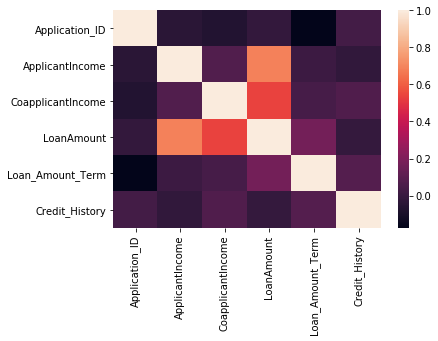

In [6]:
import seaborn as sns
sns.heatmap(data.corr())

In [8]:
data['Loan_Status'].value_counts()

Y    64
N    36
Name: Loan_Status, dtype: int64

# Cleaning data

In [2]:

#checking the missing values
data.isnull().sum()

Application_ID       0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        6
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     5
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int64

In [3]:
data['Loan_Amount_Term'].fillna(value=data['Loan_Amount_Term'].mean(),inplace=True)
data['LoanAmount'].fillna(value=data['LoanAmount'].mean(),inplace=True)

In [4]:
#returning the value of 'Credit_History' having highest frequency
from scipy.stats import mode
mode(data['Credit_History'])
mode(data['Credit_History']).mode[0]

1.0

In [5]:
#Putting the value:
data['Credit_History'].fillna(mode(data['Credit_History']).mode[0], inplace=True)

In [6]:
def gend(x):
    if x=='M':
        return 1
    elif x=='F':
        return 0 
data['Gender']=data['Gender'].apply(gend)        


In [7]:
#returning the value of 'gender' occurring most frequently
from scipy.stats import mode
mode(data['Gender'])
mode(data['Gender']).mode[0]

1.0

In [8]:
#Putting the value:
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)

In [9]:
def emp(x): 
    if x=='Yes':
        return 1
    elif x=='No':
        return 0 
data['Self_Employed']=data['Self_Employed'].apply(emp)  

In [10]:
#return the value of 'Self_Employed' occurring most frequently
mode(data['Self_Employed'])
mode(data['Self_Employed']).mode[0]

0.0

In [11]:
#Putting the value:
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)


In [12]:
def loan(x):
    if x=='Y':
        return 1
    else:
        return 0
data['Loan_Status']=data['Loan_Status'].apply(loan)    

In [13]:
def married(t):
    if t=="Yes":
        return 1
    else:
        return 0
data['Married']=data['Married'].apply(married)    

In [14]:
def area(a):
    if a=='Urban':
        return 0
    elif a=='Semiurban':
        return 1
    else:
        return 2
data['Property_Area']=data['Property_Area'].apply(area)    

In [15]:
#checking the missing values once again
data.isnull().sum()

Application_ID       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
data.dtypes

Application_ID         int64
Gender               float64
Married                int64
Dependents            object
Education             object
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [16]:
data.describe()

,Application_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,1160.470000,0.85000,0.690000,0.130000,4122.83000,1700.550000,134.221053,341.684211,0.85000,0.590000,0.640000
std,104.622212,0.35887,0.464823,0.337998,2258.89434,1947.668891,61.832975,59.741068,0.35887,0.652811,0.482418
min,1002.000000,0.00000,0.000000,0.000000,1000.00000,0.000000,17.000000,60.000000,0.00000,0.000000,0.000000
25%,1062.500000,1.00000,0.000000,0.000000,2636.00000,0.000000,100.000000,360.000000,1.00000,0.000000,0.000000
50%,1153.000000,1.00000,1.000000,0.000000,3598.00000,1558.500000,122.000000,360.000000,1.00000,0.500000,1.000000
75%,1253.500000,1.00000,1.000000,0.000000,4710.00000,2394.500000,145.750000,360.000000,1.00000,1.000000,1.000000
max,1343.000000,1.00000,1.000000,1.000000,12841.00000,10968.000000,349.000000,480.000000,1.00000,2.000000,1.000000


# EDA

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


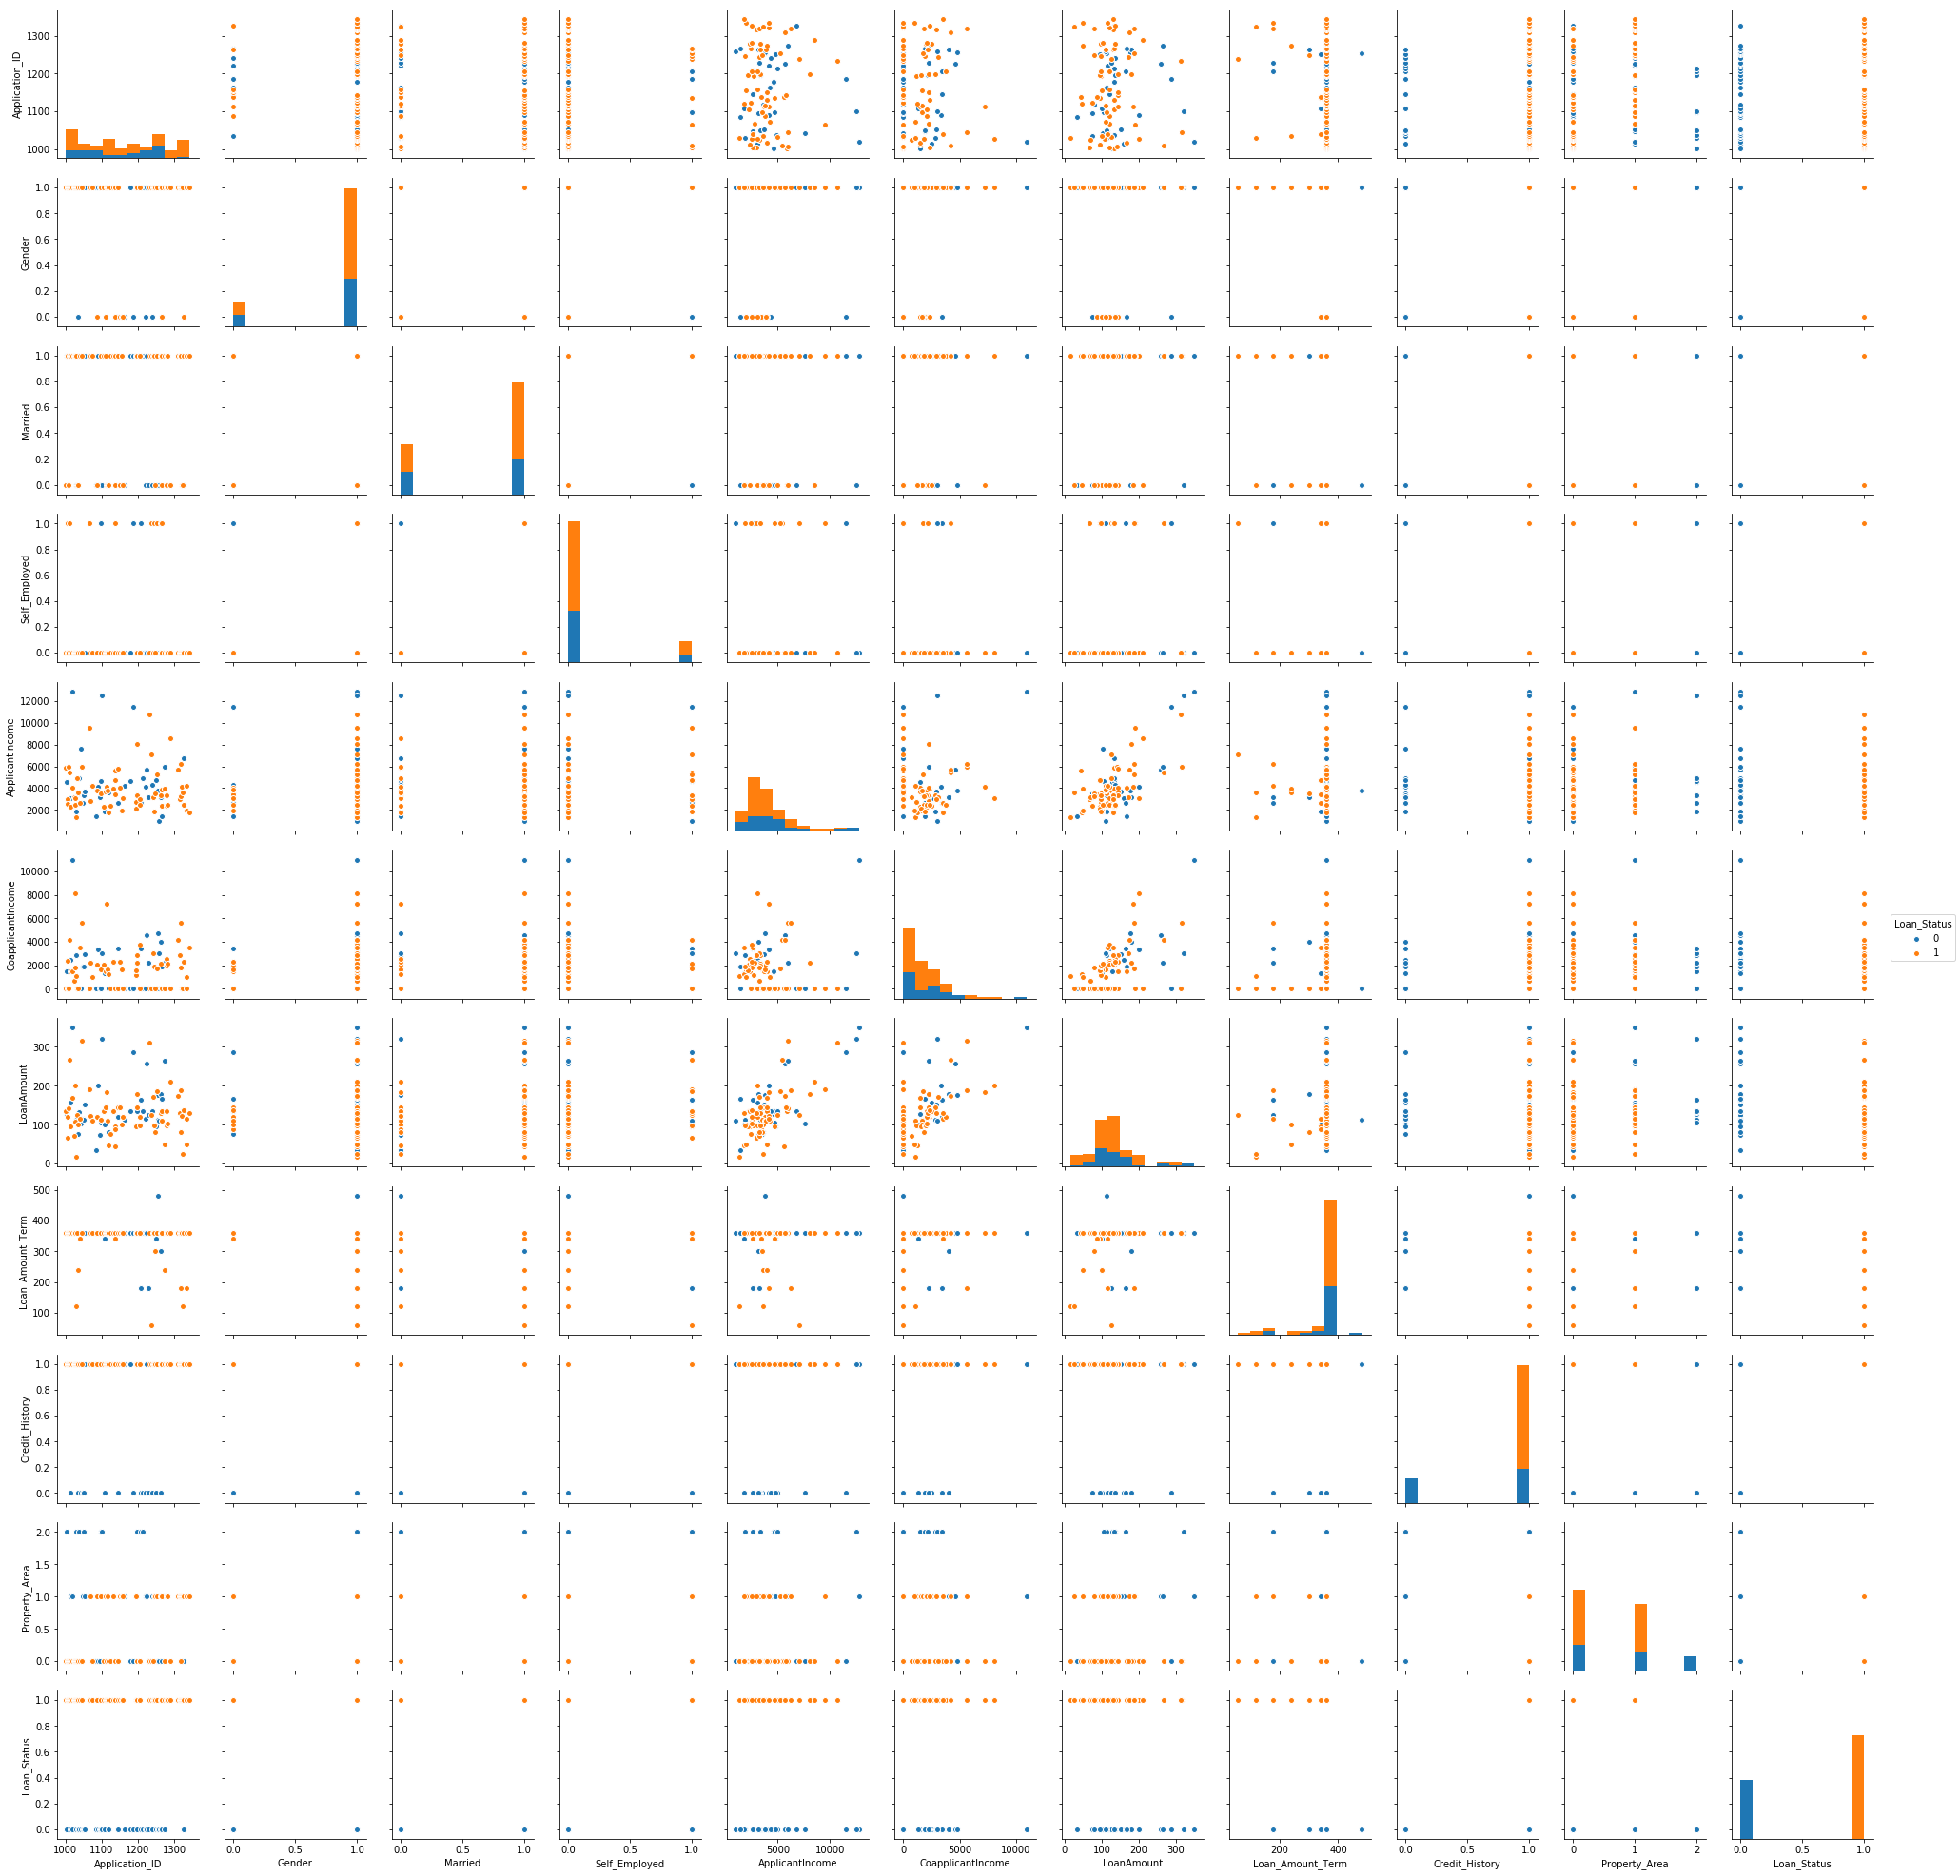

In [28]:
sns.pairplot(data,hue='Loan_Status')

f:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


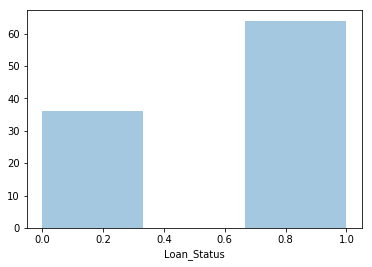

In [29]:
sns.distplot(data['Loan_Status'],kde=False)
#more people with Loan_Status= 1 ('Y')

f:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
f:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


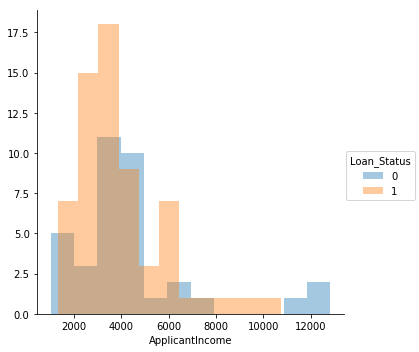

In [30]:
sns.FacetGrid(data, hue="Loan_Status", size=5)  \
            .map(sns.distplot, "ApplicantIncome",kde=False) \
            .add_legend();
plt.show()            

f:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
f:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


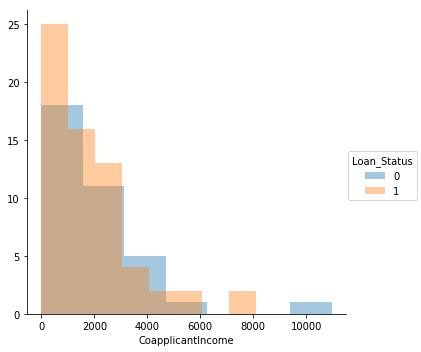

In [31]:
sns.FacetGrid(data, hue="Loan_Status", size=5)  \
            .map(sns.distplot, "CoapplicantIncome",kde=False) \
            .add_legend();
plt.show()     



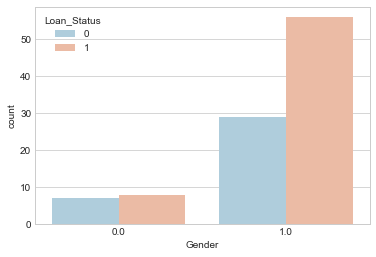

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Loan_Status',data=data,palette='RdBu_r')
#conclusion: Males are having higher probability of getting loan

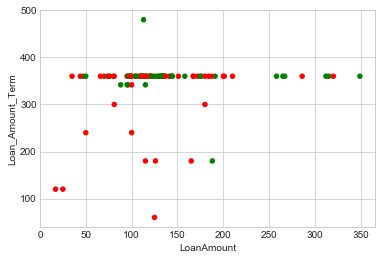

In [285]:
data.plot(kind='scatter',x='LoanAmount',
           y='Loan_Amount_Term',c=['red','green']);
plt.show()

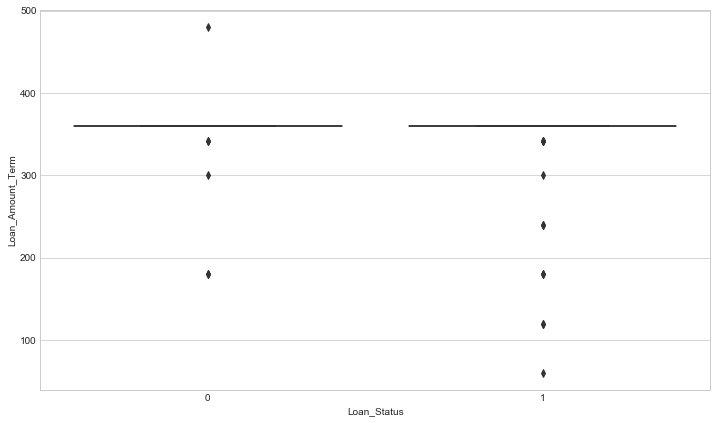

In [33]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Loan_Status',y='Loan_Amount_Term',data=data,palette='winter')

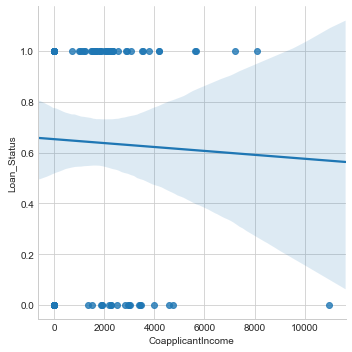

In [287]:
sns.lmplot(x='CoapplicantIncome',
          y='Loan_Status', data=data)

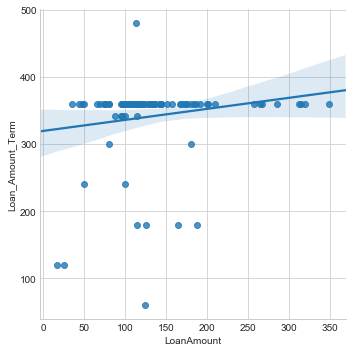

In [294]:
sns.lmplot(x='LoanAmount',
          y='Loan_Amount_Term', data=data)

f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
f:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
f:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


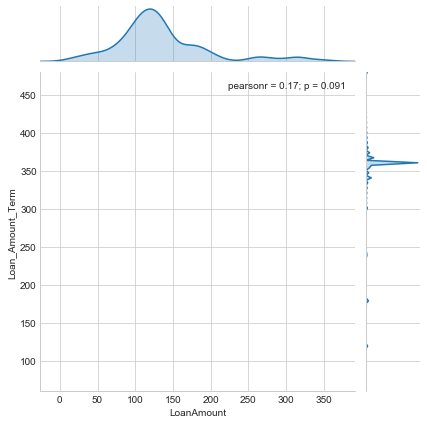

In [295]:
sns.jointplot(x='LoanAmount',y='Loan_Amount_Term',kind='kde',
              data=data)

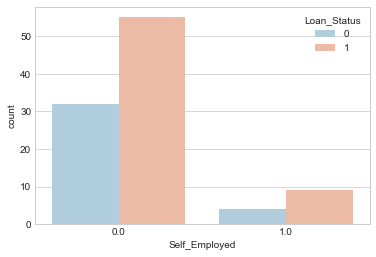

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data,palette='RdBu_r')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000564B0C0940>,
      dtype=object)

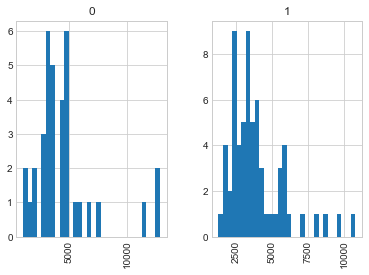

In [35]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

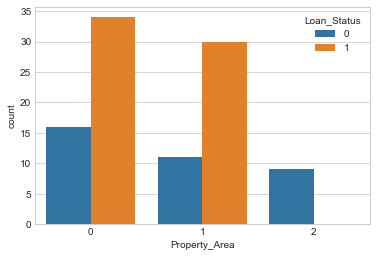

In [36]:
sns.countplot(data['Property_Area'],hue=data['Loan_Status'])

f:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


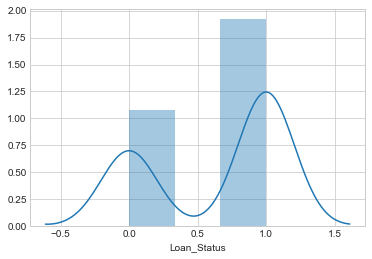

In [37]:
sns.distplot(data['Loan_Status'])

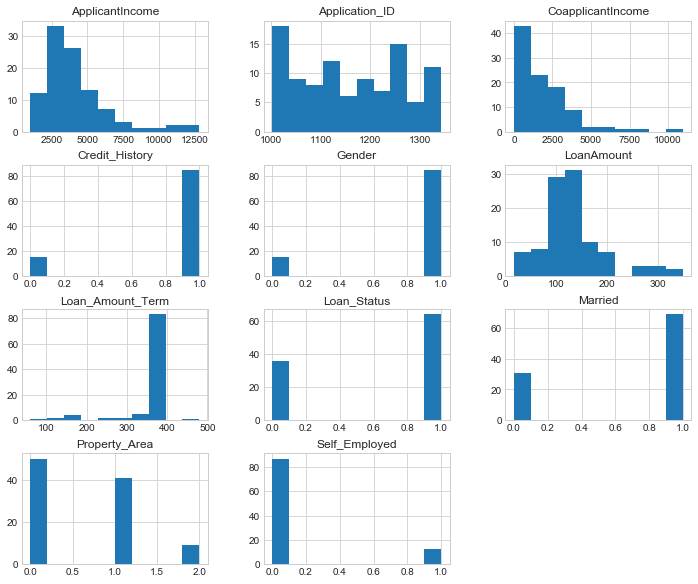

In [38]:
data.hist(figsize=(12,10))
plt.show()

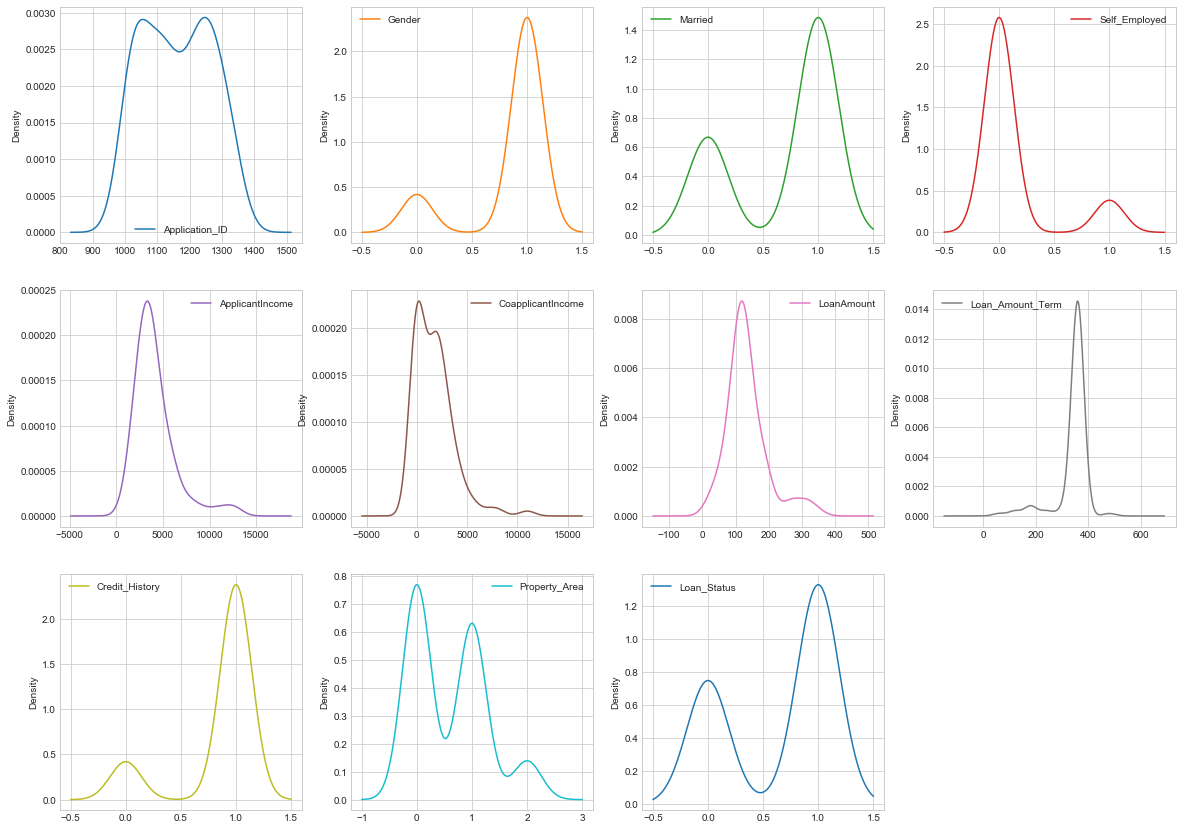

In [39]:
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(20,20))
plt.show()


# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=data[['Gender','Married','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

In [19]:
y=data['Loan_Status']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm=LinearRegression().fit(X_train,y_train)

In [43]:
predictions=lm.predict(X_test)

In [44]:
print(lm.intercept_)

0.7396534600534846


In [45]:
coeff_df= pd.DataFrame(lm.coef_,X.columns,
                      columns=['Coefficient'])
coeff_df

,Coefficient
Gender,-0.214564
Married,0.209605
ApplicantIncome,-0.000004
CoapplicantIncome,0.000003
LoanAmount,-0.001643
Loan_Amount_Term,-0.001247
Credit_History,0.777015
Property_Area,-0.106354


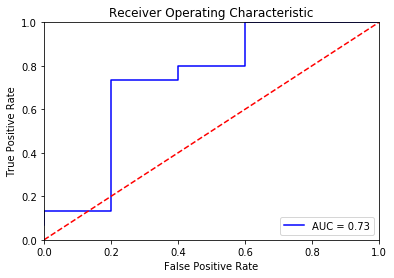

auc =  0.7333333333333334


In [46]:
#ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("auc = ",roc_auc)

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logmodel=LogisticRegression().fit(X_train,y_train)

In [78]:
predictions=logmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      0.40      0.44         5
          1       0.81      0.87      0.84        15

avg / total       0.73      0.75      0.74        20



In [26]:
print(confusion_matrix(y_test,predictions))

[[ 2  3]
 [ 2 13]]


In [68]:
from sklearn.metrics import accuracy_score

In [69]:
print('Accuracy : %2f' %accuracy_score(y_test,predictions))

Accuracy : 0.750000


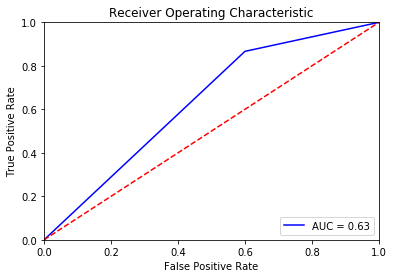

auc =  0.6333333333333333


In [40]:
#ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("auc = ",roc_auc)

# Scalability

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()

In [61]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
scaled_features=scaler.transform(X)

In [63]:
data_feat=pd.DataFrame(scaled_features)

In [64]:
data_feat.head(5)

,0,1,2,3,4,5,6,7
0,0.420084,-1.491914,0.768016,-0.877519,0.000000,0.308131,0.420084,-0.908338
1,0.420084,0.670280,0.204741,-0.099360,-0.101117,0.308131,0.420084,2.170773
2,0.420084,0.670280,-0.499575,-0.877519,-1.108870,0.308131,0.420084,-0.908338
3,0.420084,0.670280,-0.685108,0.339258,-0.231150,0.308131,0.420084,-0.908338
4,0.420084,-1.491914,0.835199,-0.877519,0.110186,0.308131,0.420084,-0.908338


# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier(n_neighbors=1)

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [73]:
predictions=knn.predict(X_test)

In [74]:
print(classification_report(y_test,predictions))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.69      0.73      0.71        15

avg / total       0.52      0.55      0.53        20



In [75]:
print(confusion_matrix(y_test,predictions))

[[ 0  5]
 [ 4 11]]


In [76]:
print('Accuracy : %2f' %accuracy_score(y_test,predictions))

Accuracy : 0.550000


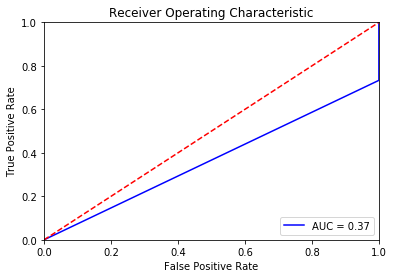

auc =  0.36666666666666664


In [77]:
#ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("auc = ",roc_auc)

In [72]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0,0.5,'Error Rate')

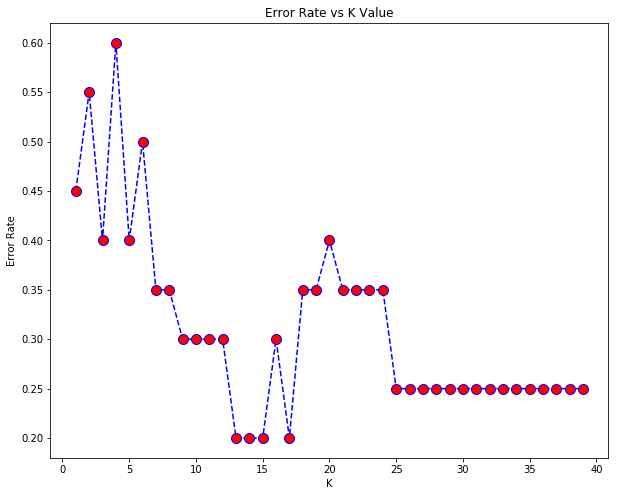

In [195]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [73]:
print("K value(s) giving minimum error rate: \n")
for i in range(0,39):
    if error_rate[i]==min(error_rate):
        print(i)


K value(s) giving minimum error rate: 

12
13
14
16


# K Means Clustering

In [94]:
from sklearn.cluster import KMeans

In [81]:
data['Random']=np.random.randint(0,2,100)
data.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Random
0,1002,1.0,0,0,Graduate,0.0,5849,0,134.221053,360.0,1.0,0,1,1
1,1003,1.0,1,1,Graduate,0.0,4583,1508,128.000000,360.0,1.0,2,0,1
2,1005,1.0,1,0,Graduate,1.0,3000,0,66.000000,360.0,1.0,0,1,0
3,1006,1.0,1,0,Not Graduate,0.0,2583,2358,120.000000,360.0,1.0,0,1,1
4,1008,1.0,0,0,Graduate,0.0,6000,0,141.000000,360.0,1.0,0,1,1


In [95]:
kmeans=KMeans(n_clusters=2)

In [96]:
kmeans.fit(data[['Gender','Married','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [97]:
kmeans.cluster_centers_

array([[8.44444444e-01, 6.88888889e-01, 3.52160000e+03, 1.70930000e+03,
        1.24565380e+02, 3.42982456e+02, 8.55555556e-01, 6.11111111e-01],
       [9.00000000e-01, 7.00000000e-01, 9.53390000e+03, 1.62180000e+03,
        2.21122105e+02, 3.30000000e+02, 8.00000000e-01, 4.00000000e-01]])

Text(0,0.5,'LoanAmount')

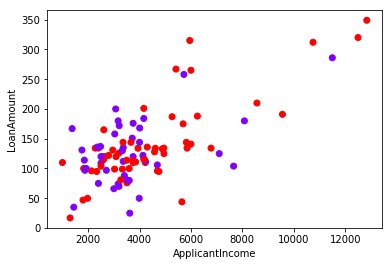

In [85]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'],c=data['Random'],cmap='rainbow')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')

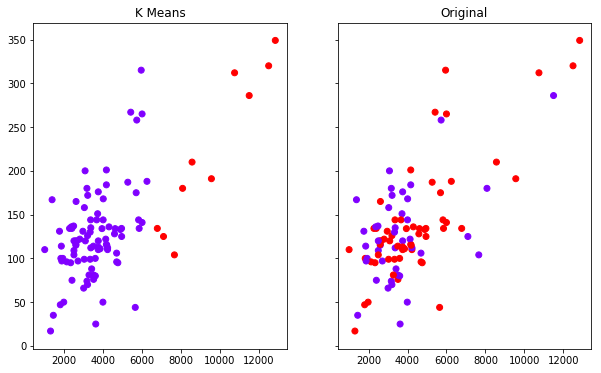

In [86]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data["ApplicantIncome"],data["LoanAmount"],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data["ApplicantIncome"],data["LoanAmount"],c=data["Random"],cmap='rainbow')


In [87]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [98]:
print("Confusion matrix: \n")
print(confusion_matrix(data['Loan_Status'],kmeans.labels_))

print("\nClassification report: \n")
print(classification_report(data['Loan_Status'],kmeans.labels_))

Confusion matrix: 

[[31  5]
 [59  5]]

Classification report: 

             precision    recall  f1-score   support

          0       0.34      0.86      0.49        36
          1       0.50      0.08      0.14        64

avg / total       0.44      0.36      0.26       100



In [99]:
print('Accuracy : %2f' %accuracy_score(data['Loan_Status'],kmeans.labels_))

Accuracy : 0.360000


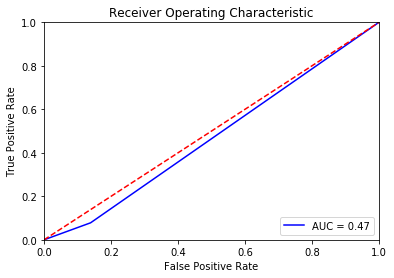

auc =  0.4696180555555556


In [100]:
#ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(data['Loan_Status'], kmeans.labels_)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("auc = ",roc_auc)

# Naive Bayes Classifier

In [101]:
from sklearn.naive_bayes import GaussianNB


In [102]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None)

In [103]:
predicted=model.predict(X_test)

In [104]:
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.25      0.20      0.22         5
          1       0.75      0.80      0.77        15

avg / total       0.62      0.65      0.64        20



In [105]:
print(confusion_matrix(y_test,predicted))

[[ 1  4]
 [ 3 12]]


In [106]:
print('Accuracy : %2f' %accuracy_score(y_test,predicted))

Accuracy : 0.650000


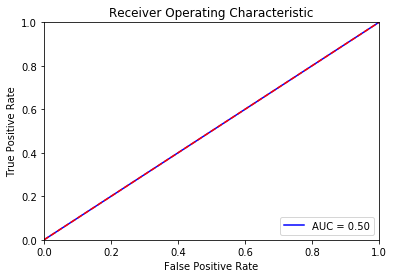

auc =  0.5


In [108]:
#ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("auc = ",roc_auc)

In [103]:
#Entering values of independent variables
#'Gender','Married','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'
test=np.array([[1,0,4000,2000,150,360,0,1]])

In [104]:
#predicting the value of dependent variable ('Loan_Status')
predicted=model.predict(test)
print(predicted)

[0]


# Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dtree=DecisionTreeClassifier()

In [111]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
predictions=dtree.predict(X_test)

In [113]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.80      0.73         5
          1       0.93      0.87      0.90        15

avg / total       0.86      0.85      0.85        20



In [114]:
print(confusion_matrix(y_test,predictions))

[[ 4  1]
 [ 2 13]]


In [117]:
print('Accuracy : %2f' %accuracy_score(y_test,predictions))

Accuracy : 0.850000


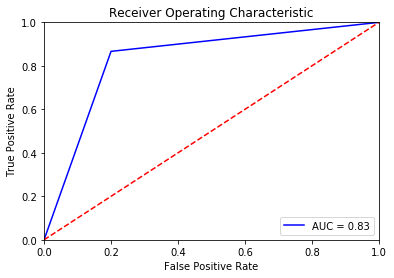

auc =  0.8333333333333334


In [118]:
#ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("auc = ",roc_auc)

In [116]:
#decision trees
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features=['Gender','Married','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
features

['Gender',
 'Married',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

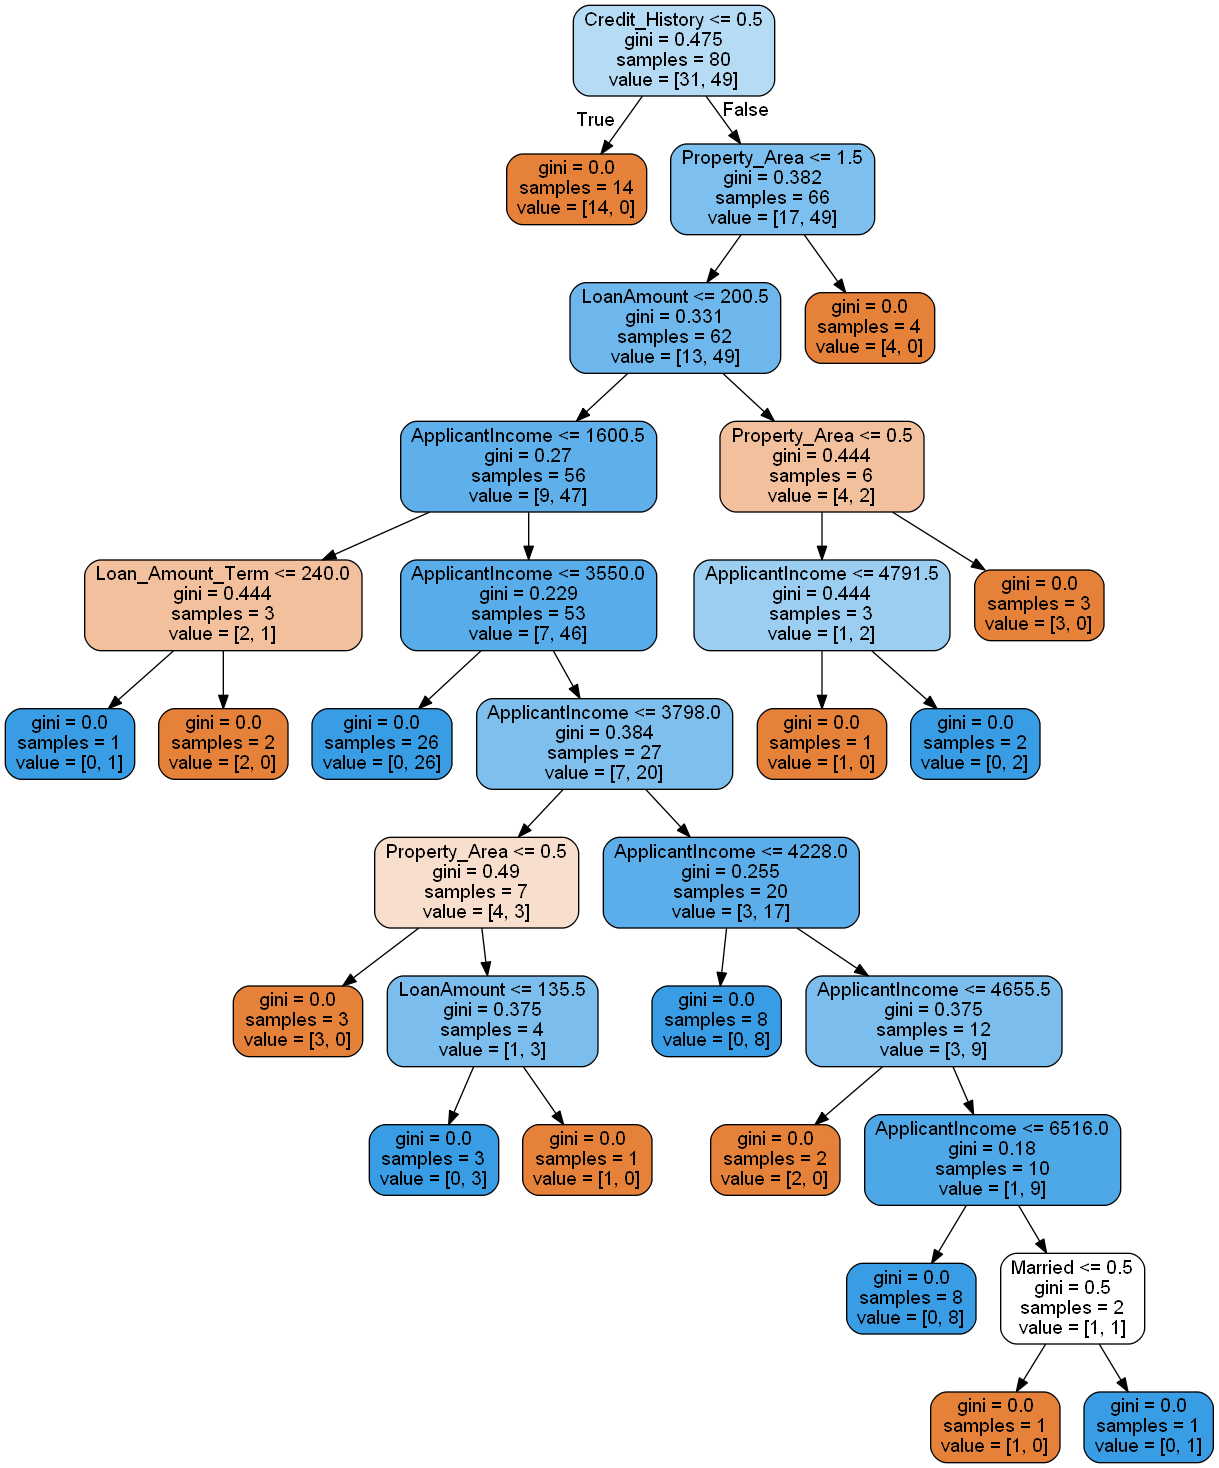

In [113]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,
                filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [120]:
predictions=rfc.predict(X_test)

In [121]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.57      0.80      0.67         5
          1       0.92      0.80      0.86        15

avg / total       0.84      0.80      0.81        20



In [122]:
print(confusion_matrix(y_test,predictions))

[[ 4  1]
 [ 3 12]]


In [123]:
print('Accuracy : %2f' %accuracy_score(y_test,predictions))

Accuracy : 0.800000


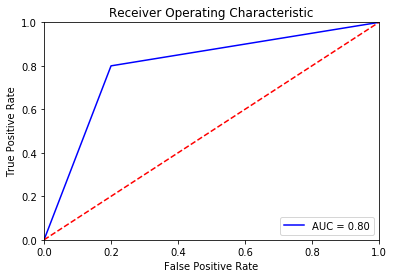

auc =  0.8


In [124]:
#ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("auc = ",roc_auc)

# Support Vector Classifier

In [134]:
from sklearn.svm import SVC

In [135]:
model=SVC()

In [136]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [137]:
predictions=model.predict(X_test)

In [138]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.75      1.00      0.86        15

avg / total       0.56      0.75      0.64        20



f:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [139]:
print(confusion_matrix(y_test,predictions))

[[ 0  5]
 [ 0 15]]


In [140]:

print('Accuracy : %2f' %accuracy_score(y_test,predictions))

Accuracy : 0.750000


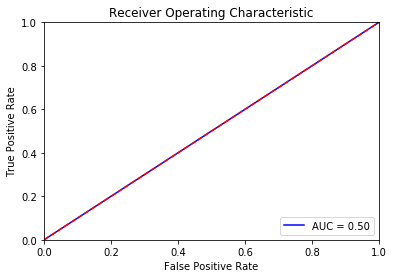

auc =  0.5


In [141]:
#ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("auc = ",roc_auc)

# GridSearch

In [142]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [145]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6071428571428571, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6153846153846154, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6153846153846154, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6071428571428571, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6153846153846154, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6153846153846154, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6071428571428571, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6153846153846154, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6153846153846154, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6071428571428571, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6153846153846154, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6153846153846154, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [146]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [147]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [148]:
grid_predictions=grid.predict(X_test)

In [149]:
print(classification_report(y_test,grid_predictions))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.75      1.00      0.86        15

avg / total       0.56      0.75      0.64        20



f:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [150]:
print(confusion_matrix(y_test,grid_predictions))

[[ 0  5]
 [ 0 15]]


In [135]:
print('Accuracy : %2f' %accuracy_score(y_test,grid_predictions))

Accuracy : 0.750000


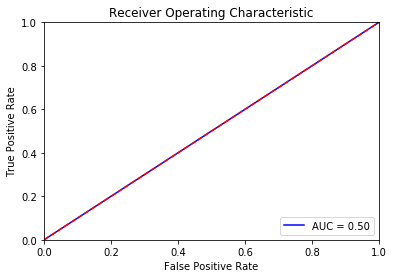

auc =  0.5


In [152]:
#ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold = roc_curve(y_test, grid_predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("auc = ",roc_auc)

# K Folds Cross Validation

In [136]:
from sklearn.model_selection import KFold

In [137]:
kf=KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [138]:
for train_index,test_index in kf.split(X):
    print('TRAIN :',train_index,'TEST :',test_index)
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index] 



TRAIN : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99] TEST : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
TRAIN : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


In [139]:
#necessary imports:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model

f:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [140]:
#fit a model
logmodel=linear_model.LogisticRegression()
model=logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)
predictions[:5]

array([1, 1, 1, 1, 1], dtype=int64)

Text(0,0.5,'Predictions')

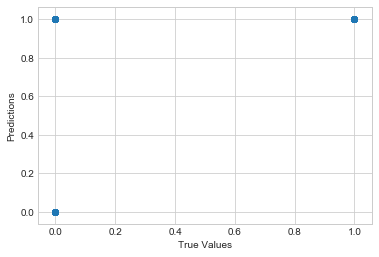

In [141]:
plt.scatter(y_test,predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [142]:
print('Score:',model.score(X_test,y_test))

Score: 0.8


In [143]:
#seeing score after cross validation
#Performing 6-fold cross validation
scores=cross_val_score(model,X,y,cv=6)
print('Cross-validated scores:',scores)

Cross-validated scores: [0.76470588 0.82352941 0.82352941 0.82352941 0.8125     0.6875    ]


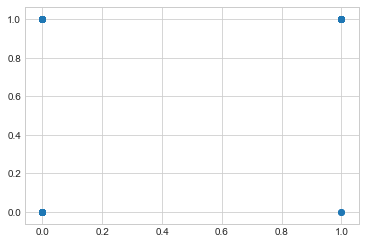

In [144]:
#make cross validated predictions
predictions=cross_val_predict(model,X,y,cv=6)
plt.scatter(y,predictions)

In [145]:
accuracy=metrics.r2_score(y,predictions)
print('Cross-Predicted Accuracy:',accuracy)

Cross-Predicted Accuracy: 0.08854166666666663


# PCA

In [151]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [152]:
#Create Pipeline
estimators=[]
estimators.append(('standardize',StandardScaler()))
estimators.append(('lda',LinearDiscriminantAnalysis()))
print(estimators)
model=Pipeline(estimators)
seed=7
kfold=KFold(n_splits=10,random_state=seed)
results=cross_val_score(model,X,y,cv=kfold)
print(results.mean())

[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lda', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))]
0.8099999999999999


In [154]:
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [155]:
features=[]
features.append(('pca',PCA(n_components=3)))
features.append(('select_best',SelectKBest(k=6)))
feature_unoin=FeatureUnion(features)
#Create Pipeline
estimators=[]
estimators.append(('logistic',LogisticRegression()))
print(estimators)
model=Pipeline(estimators)

#Evaluate pipeline
seed=7
kfold=KFold(n_splits=10,random_state=seed)
results=cross_val_score(model,X,y,cv=kfold)
print(results.mean())

[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]
0.8
